In [1]:
import datadotworld as dw
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_source = 'dakimova/medicare-partd-tidy-2016'
spend_2017 = dw.query(
    data_source,
    'SELECT * FROM medicare_partD_tidy_2017'
).dataframe.replace(r'^\s+$', np.nan, regex = True)

In [3]:
notnull_17_change = spend_2017[pd.notnull(spend_2017['annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017'])]

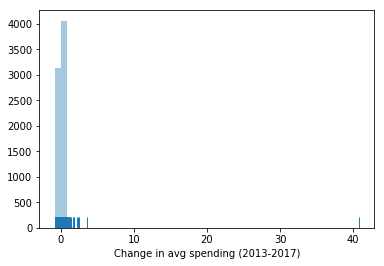

In [5]:
sns.distplot(tuple(notnull_17_change.iloc[:,4]), kde=False, rug=True)
plt.xlabel("Change in avg spending (2013-2017)")
plt.show()

In [6]:
spend_2017[spend_2017['annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017'] > 10]

,brand_name,generic_name,manufacturer,year,annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017,average_spending_per_beneficiary,average_spending_per_claim,average_spending_per_dosage_unit_weighted,change_in_average_spending_per_dosage_unit_2016_2017,total_beneficiaries,total_claims,total_dosage_units,total_spending
30768,virt-nate,"prenatal vit,cal 73/iron/folic",virtus pharmace,2017,40.815609,58.231852,18.071954,0.476876,0.93593,27.0,87.0,3297.0,1572.26


In [7]:
spend_2017[spend_2017['brand_name'] == 'virt-nate']

,brand_name,generic_name,manufacturer,year,annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017,average_spending_per_beneficiary,average_spending_per_claim,average_spending_per_dosage_unit_weighted,change_in_average_spending_per_dosage_unit_2016_2017,total_beneficiaries,total_claims,total_dosage_units,total_spending
30766,virt-nate,"prenatal vit,cal 73/iron/folic",virtus pharmace,2015,NaN,NaN,0.008182,0.000273,NaN,NaN,11.0,330.0,0.09
30767,virt-nate,"prenatal vit,cal 73/iron/folic",virtus pharmace,2016,NaN,NaN,8.460870,0.246329,NaN,NaN,69.0,2370.0,583.80
30768,virt-nate,"prenatal vit,cal 73/iron/folic",virtus pharmace,2017,40.815609,58.231852,18.071954,0.476876,0.93593,27.0,87.0,3297.0,1572.26


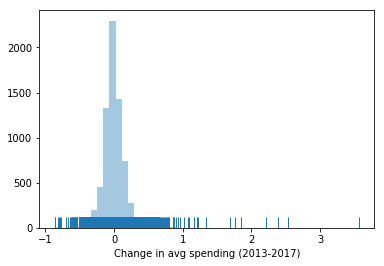

In [8]:
sns.distplot(tuple(notnull_17_change.iloc[:,4][notnull_17_change.iloc[:,4] < 10]), kde=False, rug=True)
plt.xlabel("Change in avg spending (2013-2017)")
plt.show()

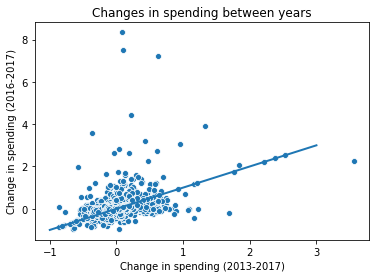

In [9]:
sns.scatterplot(
    data = notnull_17_change[notnull_17_change['annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017'] < 10],
    x = 'annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017',
    y = 'change_in_average_spending_per_dosage_unit_2016_2017'
)
plt.xlabel("Change in spending (2013-2017)")
plt.ylabel("Change in spending (2016-2017)")
plt.title("Changes in spending between years")
plt.plot([-1, 3], [-1, 3], linewidth = 2)
plt.show()

In [10]:
top_100_13_to_17_change = notnull_17_change.sort_values('annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017', ascending = False).reset_index(drop=True).iloc[0:100,:]

In [11]:
# import drug use
drug_uses_17 = dw.query('dakimova/medicare-top-drugs-analysis', 'SELECT * FROM drug_use_information_4').dataframe

In [12]:
drug_uses_17['brand_name'] = drug_uses_17['brand_name'].str.lower().str.strip()
drug_uses_17['generic_name'] = drug_uses_17['generic_name'].str.lower().str.strip()
drug_uses_17['drug_uses'] = drug_uses_17['drug_uses'].str.lower().str.strip()

In [13]:
drug_uses_17.sample(20)

,brand_name,generic_name,drug_uses
2002,polymyxin b sul-trimethoprim,polymyxin b sulf/trimethoprim,this medication is used to treat bacterial inf...
1070,gavilyte-g,"peg3350/sod sulf,bicarb,cl/kcl",peg (polyethylene glycol) with electrolyte is ...
918,estropipate,estropipate,this medication is a female hormone. it is use...
30,actimmune,"interferon gamma-1b,recomb.",this medication is used to reduce the frequenc...
1433,liothyronine sodium,liothyronine sodium,liothyronine is used to treat an underactive t...
1397,levetiracetam er,levetiracetam,levetiracetam is used with other medications t...
823,edluar,zolpidem tartrate,zolpidem is used to treat a certain sleep prob...
1256,invega sustenna,paliperidone palmitate,this medication is used to treat certain menta...
2431,targretin*,bexarotene,bexarotene is used to treat skin problems from...
2524,trandolapril,trandolapril,trandolapril is used to treat high blood press...


In [14]:
drug_uses_17['brand_name'] = drug_uses_17['brand_name'].str.replace('*', '')

In [15]:
top_13_to_17_uses = pd.merge(top_100_13_to_17_change, drug_uses_17, on = ['brand_name', 'generic_name'], how = 'left', suffixes = ('_s', '_i'))
top_13_to_17_uses[['brand_name', 'generic_name', 'drug_uses']].head(20)

,brand_name,generic_name,drug_uses
0,virt-nate,"prenatal vit,cal 73/iron/folic",this medication is a multivitamin and iron pro...
1,sodium acetate,sodium acetate,drug uses not available
2,azithromycin,azithromycin,azithromycin is used to treat a wide variety o...
3,orbactiv,oritavancin diphosphate,this medication is an antibiotic used to treat...
4,fluphenazine hcl,fluphenazine hcl,this medication is used to treat symptoms of a...
5,potassium chloride,potassium chloride,this medication is a mineral supplement used t...
6,pro comfort alcohol pads,alcohol antiseptic pads,drug uses not available
7,acyclovir,acyclovir,acyclovir is used to treat infections caused b...
8,piperacillin-tazobactam,piperacillin sodium/tazobactam,piperacillin/tazobactam is used to treat a wid...
9,thiola,tiopronin,this medication is used to prevent kidney ston...


In [16]:
# did all drugs have a match in the drug uses dataset?
sum(pd.isnull(top_13_to_17_uses['drug_uses']))
# yes

0

In [17]:
spend_2017.drop(['annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017', 'change_in_average_spending_per_dosage_unit_2016_2017'], axis=1, inplace=True)

In [18]:
spend_2017

,brand_name,generic_name,manufacturer,year,average_spending_per_beneficiary,average_spending_per_claim,average_spending_per_dosage_unit_weighted,total_beneficiaries,total_claims,total_dosage_units,total_spending
0,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2013,58.356605,21.603679,0.182160,1620.0,4376.0,5.189200e+05,9.453770e+04
1,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2014,59.073167,21.936957,0.182074,2087.0,5620.0,6.771600e+05,1.232857e+05
2,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2015,58.676413,23.140136,0.186878,2283.0,5789.0,7.175480e+05,1.339582e+05
3,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2016,63.082217,24.270027,0.206922,3423.0,8897.0,1.050323e+06,2.159304e+05
4,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2017,72.061722,25.358471,0.216163,3020.0,8582.0,1.012618e+06,2.176264e+05
5,1st tier unifine pentips plus,"pen needle, diabetic",owen mumford us,2014,41.963763,23.776391,0.200576,1289.0,2275.0,2.697250e+05,5.409129e+04
6,1st tier unifine pentips plus,"pen needle, diabetic",owen mumford us,2015,45.517725,24.979943,0.199884,4330.0,7890.0,9.860700e+05,1.970918e+05
7,1st tier unifine pentips plus,"pen needle, diabetic",owen mumford us,2016,58.550370,25.871001,0.216003,6456.0,14611.0,1.750607e+06,3.780012e+05
8,1st tier unifine pentips plus,"pen needle, diabetic",owen mumford us,2017,67.355817,26.105077,0.217358,5974.0,15414.0,1.851903e+06,4.023837e+05
9,abacavir,abacavir sulfate,apotex corp,2013,2125.232578,448.377412,7.148208,2114.0,10020.0,6.285130e+05,4.492742e+06


C:\Users\Dasha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


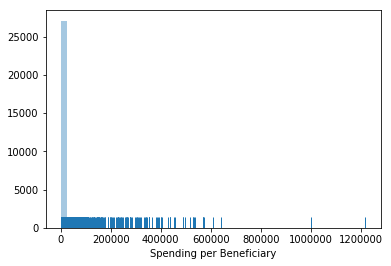

In [19]:
sns.distplot(tuple(spend_2017['average_spending_per_beneficiary'][spend_2017['average_spending_per_beneficiary'].notnull()]), kde=False, rug=True)
plt.xlabel("Spending per Beneficiary")
plt.show()

In [20]:
drug_uses_17

,brand_name,generic_name,drug_uses
0,1st tier unifine pentips,"pen needle, diabetic",drug uses not available
1,1st tier unifine pentips plus,"pen needle, diabetic",drug uses not available
2,abacavir,abacavir sulfate,this drug is used with other hiv medications t...
3,abacavir-lamivudine,abacavir sulfate/lamivudine,this product contains 2 drugs: abacavir and la...
4,abacavir-lamivudine-zidovudine,abacavir/lamivudine/zidovudine,"this product contains 3 drugs: abacavir, lamiv..."
5,abelcet,amphotericin b lipid complex,this medication is used to treat a variety of ...
6,abilify,aripiprazole,aripiprazole is used to treat certain mental/m...
7,abilify maintena,aripiprazole,extended-release aripiprazole injection is use...
8,abraxane,paclitaxel protein-bound,this medication is used to treat certain cance...
9,absorica,isotretinoin,this medication is used to treat severe cystic...


In [25]:
import nltk
from nltk.tokenize import word_tokenize

In [29]:
#top_manu_notnull = top_manu_w_use[top_manu_w_use['drug_uses'].notnull()]
#top_manu_notnull['tokenized'] = top_manu_notnull['drug_uses'].apply(word_tokenize)
#top_manu_notnull
drug_uses_17['drug_uses'].apply(word_tokenize)

0                            [drug, uses, not, available]
1                            [drug, uses, not, available]
2       [this, drug, is, used, with, other, hiv, medic...
3       [this, product, contains, 2, drugs, :, abacavi...
4       [this, product, contains, 3, drugs, :, abacavi...
5       [this, medication, is, used, to, treat, a, var...
6       [aripiprazole, is, used, to, treat, certain, m...
7       [extended-release, aripiprazole, injection, is...
8       [this, medication, is, used, to, treat, certai...
9       [this, medication, is, used, to, treat, severe...
10      [this, medication, is, used, along, with, coun...
11      [this, combination, medication, is, used, to, ...
12      [acarbose, is, used, with, a, proper, diet, an...
13      [zafirlukast, is, used, to, control, and, prev...
14      [quinapril, is, used, to, treat, high, blood, ...
15      [this, product, is, used, to, treat, high, blo...
16      [acebutolol, is, used, to, treat, high, blood,...
17      [see, 

In [30]:
drug_uses_17['tokens'] = drug_uses_17['drug_uses'].apply(word_tokenize)

In [31]:
drug_uses_17

,brand_name,generic_name,drug_uses,tokens
0,1st tier unifine pentips,"pen needle, diabetic",drug uses not available,"[drug, uses, not, available]"
1,1st tier unifine pentips plus,"pen needle, diabetic",drug uses not available,"[drug, uses, not, available]"
2,abacavir,abacavir sulfate,this drug is used with other hiv medications t...,"[this, drug, is, used, with, other, hiv, medic..."
3,abacavir-lamivudine,abacavir sulfate/lamivudine,this product contains 2 drugs: abacavir and la...,"[this, product, contains, 2, drugs, :, abacavi..."
4,abacavir-lamivudine-zidovudine,abacavir/lamivudine/zidovudine,"this product contains 3 drugs: abacavir, lamiv...","[this, product, contains, 3, drugs, :, abacavi..."
5,abelcet,amphotericin b lipid complex,this medication is used to treat a variety of ...,"[this, medication, is, used, to, treat, a, var..."
6,abilify,aripiprazole,aripiprazole is used to treat certain mental/m...,"[aripiprazole, is, used, to, treat, certain, m..."
7,abilify maintena,aripiprazole,extended-release aripiprazole injection is use...,"[extended-release, aripiprazole, injection, is..."
8,abraxane,paclitaxel protein-bound,this medication is used to treat certain cance...,"[this, medication, is, used, to, treat, certai..."
9,absorica,isotretinoin,this medication is used to treat severe cystic...,"[this, medication, is, used, to, treat, severe..."


In [24]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'of', 'the', 'wouldn', 'weren', 'here', 'himself', 'him', 'their', 'm', 'theirs', "you'll", "wouldn't", "mightn't", 'only', 'you', 'what', "wasn't", 'from', 'has', 'ma', 'up', 'were', "you've", "it's", 'very', 'yours', 'herself', 'then', 'hasn', 'they', 'not', 'been', 'd', 'being', 'because', 'mightn', "hadn't", 'a', 'under', 'or', 'just', 'does', 'she', 'other', 'will', 'those', 'out', 'myself', "hasn't", 'am', 'these', 'during', "should've", 'it', 'how', "needn't", 'further', 'our', 'against', 'we', 'some', 'have', "haven't", 'on', 'when', 'too', 'o', 'but', 'was', 'yourself', 'for', "that'll", 'now', 'did', 'an', 'couldn', 'while', 'such', 'same', 'by', 'more', 'down', 'do', 'ourselves', "you'd", 'having', 'into', 'hadn', 't', 'my', 'there', "weren't", 'its', 'any', 'off', 'hers', "couldn't", 'her', 'between', 'didn', 'doesn', 'shouldn', 'through', "isn't", 'why', 'shan', 'which', 'as', 'ain', 'll', 're', 'isn', 'than', 'his', 'this', 'can', 's', 'each', 'where', 'had', 'until', 'f